In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"E:\Study\统计建模\python\predict\merged_predict.csv")

# 加权求和（假设等权重）
df['Weighted_Proba'] = (df['LogisticRegression'] * 3/4 + df['Random Forest'] * 1/8 +df['MLP']*1/8)

# 将概率转换为二分类标签（阈值0.5）
df['Weighted_Pred'] = (df['Weighted_Proba'] >= 0.5).astype(int)

In [7]:
# 提取真实标签和预测标签
y_true = df['Diagnosis']
y_pred = (df['Random Forest']>= 0.5).astype(int)

# 生成分类报告
report = classification_report(y_true, y_pred,digits=4,target_names=['Benign', 'Malignant'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign     0.8483    0.9400    0.8918     32615
   Malignant     0.6942    0.4474    0.5441      9924

    accuracy                         0.8251     42539
   macro avg     0.7712    0.6937    0.7180     42539
weighted avg     0.8123    0.8251    0.8107     42539



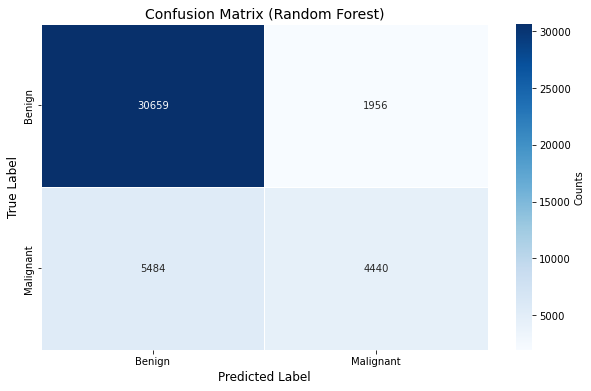

In [9]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=class_names, 
                yticklabels=class_names,
                linewidths=0.5,
                cbar_kws={'label': 'Counts'})
    plt.title("Confusion Matrix (Random Forest)", fontsize=14)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    # plt.xticks(rotation=45)
    # plt.yticks(rotation=0)
    plt.show()

# 调用函数
plot_confusion_matrix(y_true, y_pred, class_names=['Benign', 'Malignant'])